In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from lmfit.models import VoigtModel,PseudoVoigtModel, LinearModel
from scipy import stats
from scipy.signal import savgol_filter
plt.rcParams["figure.figsize"] = (20,10)

In [28]:
def center(x,y):
    mod = PseudoVoigtModel()
    pars = mod.guess(y, x=x)
    out  = mod.fit(y, pars, x=x)
    center =out.best_values['center']
    return center

In [29]:
def removerbackground(x,y,m=5):

    minimo= np.mean( np.sort(y)[:10])
    for i in range(len(y)):
        y[i]=y[i]-minimo
    slope, intercept, r_value, p_value, std_err = stats.linregress(np.append(x[:m],x[-m:]),np.append(y[:m],y[-m:]))
    abline_values = [slope * i + intercept for i in x]
    abline_values=np.asarray(abline_values)
    return removerzero(y-abline_values)

In [30]:
#return y
def background(y):
    minimo=min(y)
    for i in range(len(y)):
        y[i]-=minimo
    return y

#return y
def normalizar(y):
    minimo=max(y)
    for i in range(len(y)):
        y[i]/=minimo
    return y

def removerzero(vetor):
    for key, value in enumerate(vetor):
        if value <0:
            vetor[key]=0

    for key,value in enumerate(vetor):
        try:
            if vetor[key+1]==0 and value >0:
                vetor[key]=0
        except:
            pass
    return vetor

In [31]:
def processing_of_data(x,y):
    y = normalizar(y)

    y = background(y)
    y = savgol_filter(y, 5, 2)
    y = removerbackground(x,y)
    y = normalizar(y)
    return y

In [32]:
def lenar_calc(x,y):
    mod = LinearModel()
    pars = mod.guess(y, x=x)
    out  = mod.fit(y, pars, x=x)
    calc= out.best_values['slope']
    stress=calc*(-299.63864925025223)
    stress=round(stress,3)
    #plt.plot(x,out.bes_fit)
    return stress, x , out.best_fit
    #print(out.best_values)

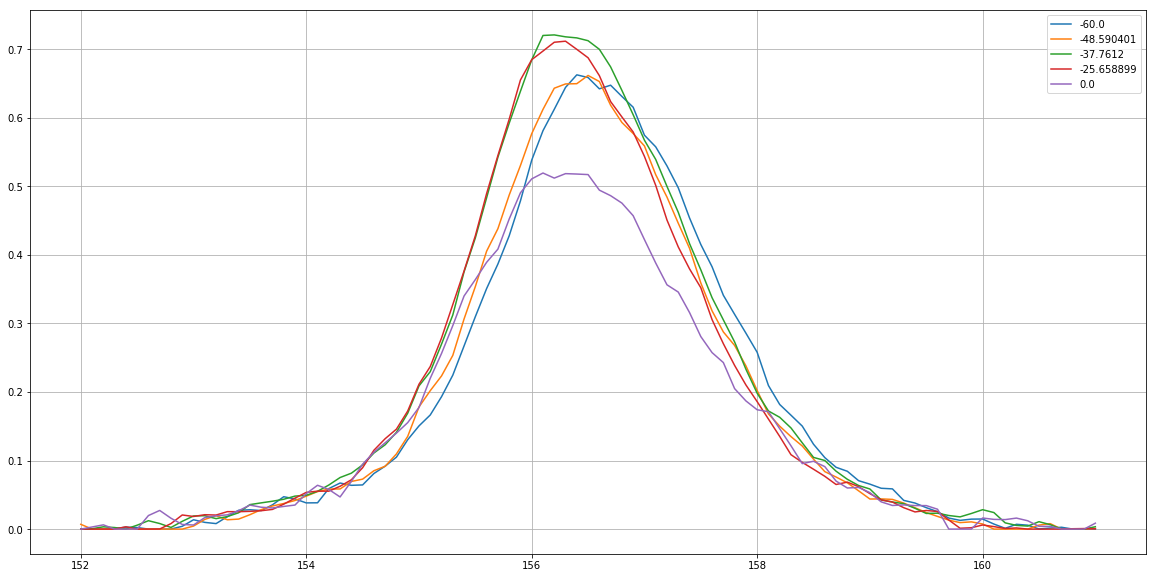

In [33]:
def get_value(i):
    return float(i.split(' ')[-1].split('\n')[0])

def conver_list(i):
    value = i.split(',')
    for i in value:
        if len(x)==0:
            x.append(dicio['*START'])
            y.append(float(i))
            dicio['*NEW_DICIO']=(dicio['*START']+dicio['*STEP'])
        else:
            x.append(dicio['*NEW_DICIO'])
            dicio['*NEW_DICIO']=(dicio['*NEW_DICIO']+dicio['*STEP'])
            y.append(float(i))
            
dicio={
    '*START':0.0,
    '*STOP' :0.0,
    '*STEP' :0.0,
    '*ST_PSI_ANGLE':0.0
}

dados={}

list_keys = list(dicio.keys())

file ='P_L_1/P_PB_L_1.ASC'
r = open(file,'r')
find_intensity=False
x=[]
y=[]
for i in r:
    #print(i)
    if '*END' in i:
        find_intensity=False
        vx = np.asarray(x)
        vy = np.asarray(y)
        vy = processing_of_data(vx,vy)
        plt.plot(vx,vy,label=dicio['*ST_PSI_ANGLE'])
        plt.grid()
        plt.legend()
        #plt.plot(vy)
        dados[dicio['*ST_PSI_ANGLE']]={}
        dados[dicio['*ST_PSI_ANGLE']]['x']=vx
        dados[dicio['*ST_PSI_ANGLE']]['y']=vy
        x=[]
        y=[]
    elif find_intensity:
        conver_list(i)
    elif '*START' in i:
        dicio['*START']=get_value(i)
    elif '*STOP' in i:
        dicio['*STOP']=get_value(i)
    elif '*STEP' in i:
        dicio['*STEP']=get_value(i)
    elif '*ST_PSI_ANGLE' in i:
        dicio['*ST_PSI_ANGLE']=get_value(i)        
    elif '*COUNT' in i and not '*COUNTER' in i:
        find_intensity=True        


vx = np.asarray(x)
vy = np.asarray(y)

In [34]:
dados.keys()

dict_keys([-60.0, -48.590401, -37.7612, -25.658899, 0.0])

In [35]:
center_list =[]
psi_list =[]
for key, value in dados.items():
    psi_list.append(np.sin(np.radians(key))**2)
    center_list.append(center(value['x'],value['y']))
    print('center: {} <--> psi: {}'.format(center(value['x'],value['y']),np.sin(np.radians(key))**2))

center: 156.63447432795883 <--> psi: 0.7499999999999999
center: 156.5149223645068 <--> psi: 0.5625004001694001
center: 156.4382500640678 <--> psi: 0.37499925801174505
center: 156.38605662464272 <--> psi: 0.18749990090574636
center: 156.4005011523907 <--> psi: 0.0


Text(0,0.5,'$2\\Theta (Degre)$')

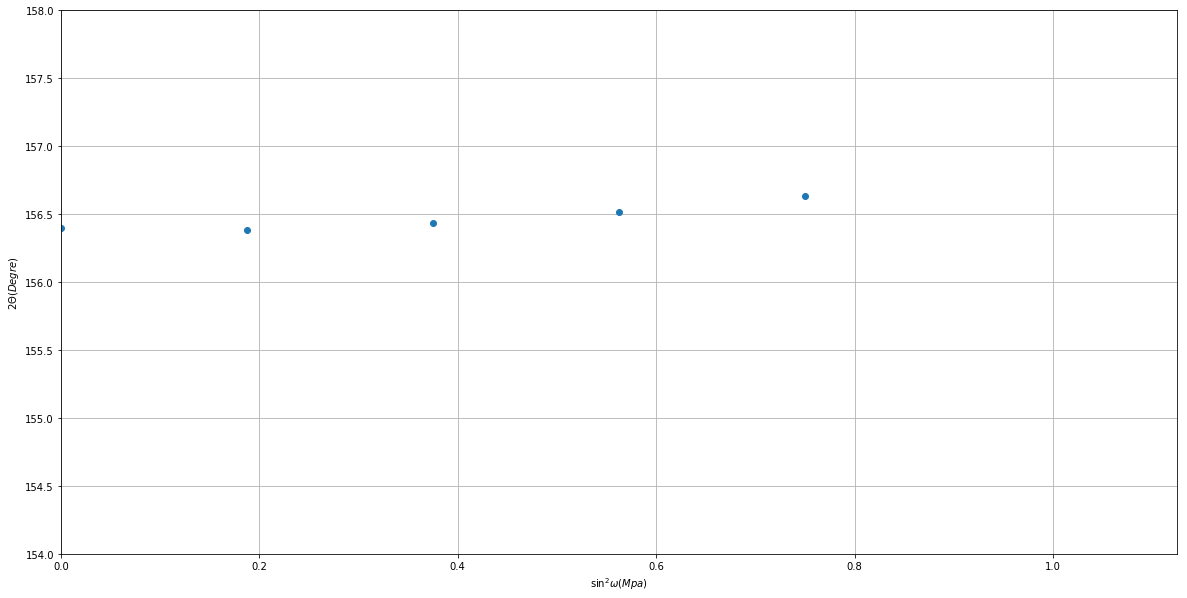

In [36]:
plt.plot(psi_list,center_list,'o')
miny=int(min(center_list))-2
maxy=int(max(center_list))+2
maxx=round(max(psi_list),3)+round(max(psi_list),3)/2
plt.axis([0,maxx,miny,maxy])

plt.grid()
#plt.title(dados)
plt.xlabel('$\sin ^{2}\omega (Mpa)$')
plt.ylabel('$2\Theta (Degre)$')

In [37]:
legenda ,x,bestY= lenar_calc(psi_list,center_list)

In [38]:
legenda

-95.375

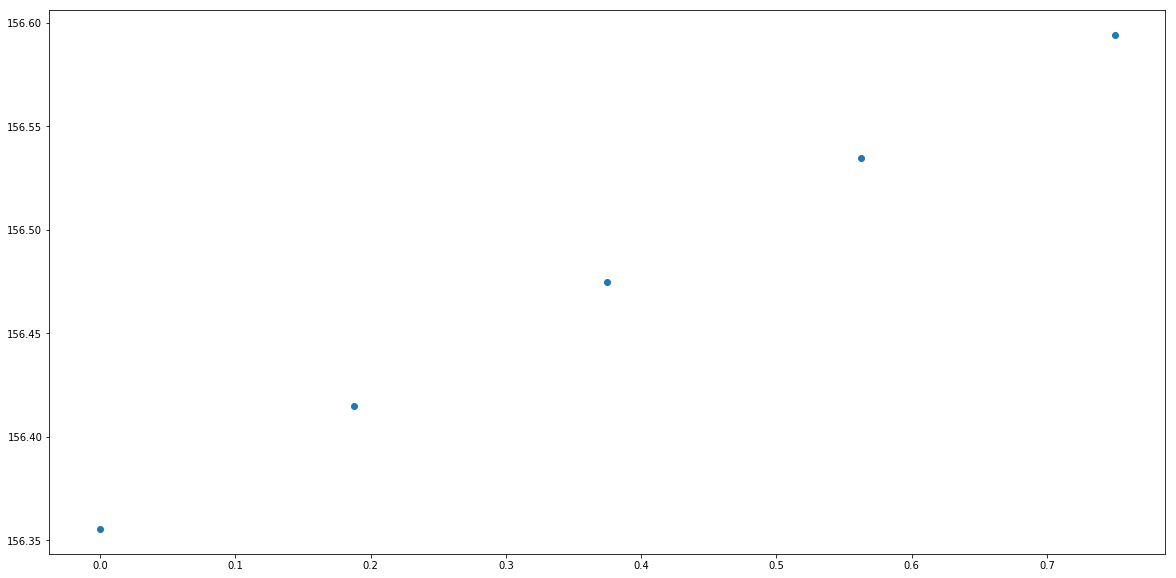

In [39]:
plt.plot(x,bestY,'o')

Text(0,0.5,'$2\\Theta (Degre)$')

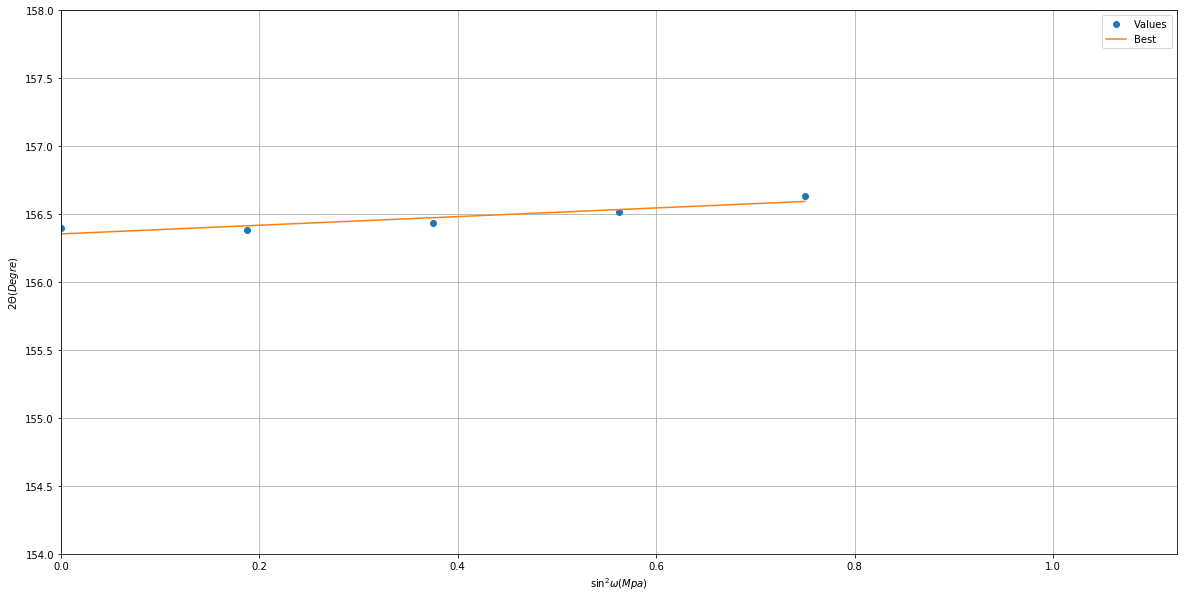

In [40]:
plt.plot(psi_list,center_list,'o',label='Values')
plt.plot(x,bestY,label='Best')
miny=int(min(center_list))-2
maxy=int(max(center_list))+2
maxx=round(max(psi_list),3)+round(max(psi_list),3)/2
plt.axis([0,maxx,miny,maxy])

plt.grid()
#plt.title(dados)
plt.legend()
plt.xlabel('$\sin ^{2}\omega (Mpa)$')
plt.ylabel('$2\Theta (Degre)$')

In [41]:
print('Valor: {}'.format(legenda))

Valor: -95.375
